# Importing needful libraries

In [2]:
import numpy as np
import pylab as plt
import networkx as nx

# Set the connected points

In [3]:
# map cell to cell, add circular cell to goal point
points_list = [(0,1), (1,5), (5,6), (5,4), (1,2), (2,3), (2,7)]

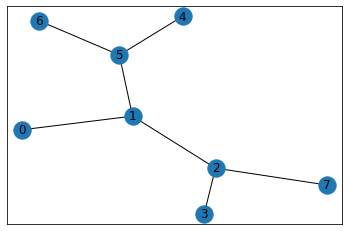

In [12]:
goal = 7
G=nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

# Reward Matrix

In [13]:
# how many points in graph? x points
MATRIX_SIZE = 8

# create matrix x*y
R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
R *= -1

In [14]:
R

matrix([[-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.]])

In [15]:
# assign zeros to paths and 100 to goal-reaching point
for point in points_list:
    print(point)
    if point[1] == goal:
        R[point] = 100
    else:
        R[point] = 0

    if point[0] == goal:
        R[point[::-1]] = 100
    else:
        # reverse of point
        R[point[::-1]]= 0

# add goal point round trip
R[goal,goal]= 100

(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(2, 3)
(2, 7)


In [16]:
R

matrix([[ -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,   0.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,   0.,  -1.,  -1.,  -1., 100.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,  -1.,   0.,  -1.,   0.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1., 100.]])

# Q Matrix

In [17]:
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))
Q

matrix([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

# All available actions can be performed

In [18]:
def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

# Take a random action

In [19]:
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

# Update the position (Moving)

In [20]:
def update(current_state, action, gamma):
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]
    
    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]
  
    Q[current_state, action] = R[current_state, action] + gamma * max_value
    print('max_value', R[current_state, action] + gamma * max_value)

    if (np.max(Q) > 0):
        return(np.sum(Q/np.max(Q)*100))
    else:
        return (0)

# Performing

In [21]:
gamma = 0.8
initial_state = 1

available_act = available_actions(initial_state) 
action = sample_next_action(available_act)
update(initial_state, action, gamma)

max_value 0.0


0

# Training the Q Matrix

In [22]:
scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)
    print ('Score:', str(score))
    
print("Trained Q matrix:")
print(Q/np.max(Q)*100)

max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 100.0
Score: 100.0
max_value 80.0
Score: 180.0
max_value 64.0
Score: 244.0
max_value 0.0
Score: 244.0
max_value 100.0
Score: 344.0
max_value 0.0
Score: 344.0
max_value 80.0
Score: 424.0
max_value 80.0
Score: 504.0
max_value 80.0
Score: 504.0
max_value 0.0
Score: 504.0
max_value 0.0
Score: 504.0
max_value 0.0
Score: 504.0
max_value 0.0
Score: 504.0
max_value 0.0
Score: 504.0
max_value 0.0
Score: 504.0
max_value 64.0
Score: 504.0
max_value 64.0
Score: 504.0
max_value 180.0
Score: 324.4444444444444
max_value 64.0
Score: 360.0
max_value 144.0
Score: 395.55555555555554
max_value 0.0
Score: 395.55555555555554
max_value 1

Score: 982.691342994316
max_value 255.96998369241396
Score: 982.691342994316
max_value 319.96247961551745
Score: 982.691342994316
max_value 319.96247961551745
Score: 982.691342994316
max_value 399.96247961551745
Score: 982.691342994316
max_value 204.77598695393118
Score: 982.6959209106358
max_value 255.96998369241396
Score: 982.6959209106358
max_value 319.96247961551745
Score: 982.6959209106358
max_value 319.96247961551745
Score: 982.6959209106358
max_value 399.96247961551745
Score: 982.6977971058488
max_value 255.96998369241396
Score: 982.6977971058488
max_value 204.77598695393118
Score: 982.6977971058488
max_value 204.77598695393118
Score: 982.6977971058488
max_value 255.96998369241396
Score: 982.6977971058488
max_value 255.96998369241396
Score: 982.6977971058488
max_value 255.96998369241396
Score: 982.6977971058488
max_value 319.96247961551745
Score: 982.6977971058488
max_value 399.96247961551745
Score: 982.6996733010619
max_value 255.96998369241396
Score: 982.6996733010619
max_valu

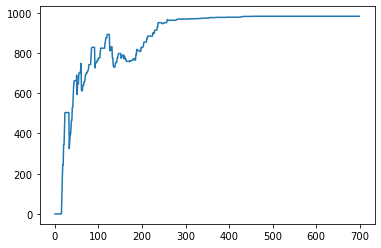

In [23]:
plt.plot(scores)
plt.show()

# Applying the trained Q Matrix

In [24]:
current_state = 0
steps = [current_state]

while current_state != 7:

    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
    
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    
    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path:")
print(steps)

Most efficient path:
[0, 1, 2, 7]
